In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Embedding, Flatten, Bidirectional, SimpleRNN, LSTM, GRU

import warnings
warnings.filterwarnings("ignore")

In [2]:
food_rev=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL-NLP/food_review.csv")

In [3]:
food_rev.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [4]:
food_rev.shape

(40500, 3)

In [5]:
food_rev.Score.max()

5

In [6]:
food_rev.Score.min()

1

In [7]:
food_rev['Score'].value_counts(sort=False)

1    8079
2    8095
3    8103
4    8117
5    8106
Name: Score, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
le.fit(food_rev['Score'])
food_rev['Score']=le.transform(food_rev['Score'])

In [10]:
food_rev['Score'].value_counts(sort=False)

0    8079
1    8095
2    8103
3    8117
4    8106
Name: Score, dtype: int64

In [11]:
from wordcloud import WordCloud

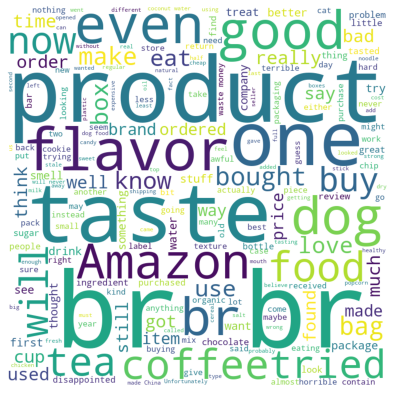

In [12]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)
wc.generate(''.join(food_rev[food_rev["Score"]==0]["Text"]))
plt.figure(figsize = (7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

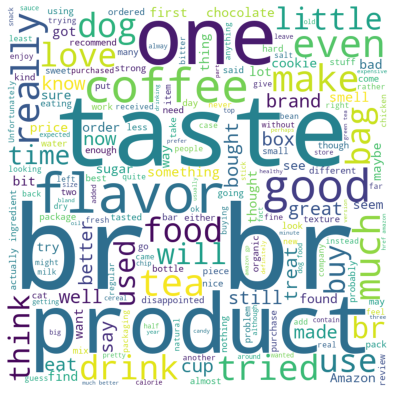

In [13]:
wc1 = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)
wc1.generate(''.join(food_rev[food_rev["Score"]==1]["Text"]))
plt.figure(figsize = (7,7)) 
plt.imshow(wc1) 
plt.axis("off") 
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
food_rev['Text'].head()

0    I bought these from a large chain pet store. a...
1    This soup is incredibly good!  But honestly, I...
2    Our family loves these tasty and healthy sesam...
3    The local auto shop offers this free to it cus...
4    I brought 2 bottles.  One I carry in my pocket...
Name: Text, dtype: object

In [17]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [18]:
stop=stopwords.words('english')

In [19]:
html_tag_words=['br']

In [20]:
stop_words=stop+html_tag_words

In [21]:
def decontract(Text):
    Text = re.sub(r"won\'t", "will not", Text)
    Text = re.sub(r"can\'t", "can not", Text)
    Text = re.sub(r"didn\'t", "did not", Text)
    Text = re.sub(r"n\'t", " not", Text)
    Text = re.sub(r"\'re", " are", Text)
    Text = re.sub(r"\'s", " is", Text)
    Text = re.sub(r"\'d", " would", Text)
    Text = re.sub(r"\'ll", " will", Text)
    Text = re.sub(r"\'t", " not", Text)
    Text = re.sub(r"\'ve", " have", Text)
    Text = re.sub(r"\'m", " am", Text)
    return Text

In [22]:
def clean(review):
    review = re.sub(r"http\S+", "", review)             # removing website links
    review = BeautifulSoup(review, 'lxml').get_text()   # removing html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing the words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             # converting to lower case
    review = [word for word in review.split(" ") if not word in stop_words] # removing stop words
    review = [lemmatizer.lemmatize(token, "v") for token in review] #Lemmatization
    review = " ".join(review)
    review.strip()
    return review

In [23]:
lemmatizer = WordNetLemmatizer()

In [24]:
food_rev['Text'] = food_rev['Text'].apply(clean)

In [25]:
food_rev['Text'].head(10)

0    buy large chain pet store read review check ba...
1    soup incredibly good honestly look better deal...
2    family love tasty healthy sesame honey almonds...
3    local auto shop offer free customers try twice...
4    bring bottle one carry pocket home fell love v...
5    recommend product relative mine must say feel ...
6                           blunt would call orangina 
7    stuff suck let explain clump nice easy keep li...
8    add slice saute veggies onions make delcious a...
9    pamela make awesome delicious easy use wheatfr...
Name: Text, dtype: object

In [26]:
x = food_rev["Text"]
y = food_rev["Score"]

In [27]:
x.head(10)

0    buy large chain pet store read review check ba...
1    soup incredibly good honestly look better deal...
2    family love tasty healthy sesame honey almonds...
3    local auto shop offer free customers try twice...
4    bring bottle one carry pocket home fell love v...
5    recommend product relative mine must say feel ...
6                           blunt would call orangina 
7    stuff suck let explain clump nice easy keep li...
8    add slice saute veggies onions make delcious a...
9    pamela make awesome delicious easy use wheatfr...
Name: Text, dtype: object

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

In [31]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)

In [32]:
doc_length = []
for doc in train_sequences:
  doc_length.append(len(doc))
max(doc_length)

925

In [33]:
np.quantile(doc_length,0.95)

111.0

In [34]:
max_length = 111

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
train_padded = pad_sequences(train_sequences, maxlen=max_length)
print(train_padded)

[[   0    0    0 ...  634 1037   60]
 [   0    0    0 ...   96  515  837]
 [   0    0    0 ... 1091  457  258]
 ...
 [   0    0    0 ...   27 1498  938]
 [   0    0    0 ...   74  795  178]
 [   0    0    0 ...  107 1879  180]]


In [37]:
vocab_len = len(tokenizer.index_word)+1

In [38]:
from tensorflow.keras.models import Sequential

**LSTM**

In [39]:
model = Sequential()
model.add(Embedding(vocab_len, 200, input_length=max_length, mask_zero=True))
model.add(LSTM(16, activation="tanh", return_sequences=True))
model.add(LSTM(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(5,activation="softmax"))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 111, 200)          5562400   
_________________________________________________________________
lstm (LSTM)                  (None, 111, 16)           13888     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 5,578,853
Trainable params: 5,578,853
Non-trainable params: 0
______________________________________________

In [41]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [42]:
model.fit(train_padded,y_train,epochs=30,batch_size=128)

Epoch 1/30
254/254 [==============================] - 62s 225ms/step - loss: 1.4514
Epoch 2/30
254/254 [==============================] - 57s 224ms/step - loss: 1.1882
Epoch 3/30
254/254 [==============================] - 56s 220ms/step - loss: 1.0259
Epoch 4/30
254/254 [==============================] - 55s 217ms/step - loss: 0.8853
Epoch 5/30
254/254 [==============================] - 56s 221ms/step - loss: 0.7593
Epoch 6/30
254/254 [==============================] - 56s 222ms/step - loss: 0.6492
Epoch 7/30
254/254 [==============================] - 56s 220ms/step - loss: 0.5428
Epoch 8/30
254/254 [==============================] - 55s 217ms/step - loss: 0.5649
Epoch 9/30
254/254 [==============================] - 56s 221ms/step - loss: 0.4261
Epoch 10/30
254/254 [==============================] - 57s 223ms/step - loss: 0.3483
Epoch 11/30
254/254 [==============================] - 57s 223ms/step - loss: 0.3011
Epoch 12/30
254/254 [==============================] - 56s 220ms/step - lo

In [43]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [44]:
y_pred=model.predict(test_padded)

In [45]:
y_pred=y_pred.argmax(axis=1)

In [46]:
y_pred

array([1, 0, 4, ..., 4, 2, 3])

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1613
           1       0.42      0.48      0.45      1575
           2       0.47      0.45      0.46      1683
           3       0.44      0.48      0.46      1609
           4       0.61      0.54      0.57      1620

    accuracy                           0.50      8100
   macro avg       0.51      0.50      0.50      8100
weighted avg       0.51      0.50      0.50      8100



**Bi-Directional LSTM**

In [102]:
model2 = Sequential()
model2.add(Embedding(vocab_len,200, input_length=max_length, mask_zero=True))
model2.add(Bidirectional(LSTM(32, activation="tanh", return_sequences=True)))
model2.add(Bidirectional(LSTM(32, activation="relu")))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(5,activation="softmax"))

In [103]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [104]:
model2.fit(train_padded,y_train,epochs=40,batch_size=128)

Epoch 1/40
254/254 [==============================] - 147s 543ms/step - loss: 10595.0176
Epoch 2/40
254/254 [==============================] - 139s 546ms/step - loss: 1.2499
Epoch 3/40
254/254 [==============================] - 138s 542ms/step - loss: 1.0517
Epoch 4/40
254/254 [==============================] - 138s 543ms/step - loss: 0.8933
Epoch 5/40
254/254 [==============================] - 137s 539ms/step - loss: 0.7746
Epoch 6/40
254/254 [==============================] - 137s 539ms/step - loss: 0.6745
Epoch 7/40
254/254 [==============================] - 140s 550ms/step - loss: 0.6737
Epoch 8/40
254/254 [==============================] - 138s 542ms/step - loss: 0.5647
Epoch 9/40
254/254 [==============================] - 140s 552ms/step - loss: 0.4877
Epoch 10/40
254/254 [==============================] - 137s 540ms/step - loss: 0.4315
Epoch 11/40
254/254 [==============================] - 137s 541ms/step - loss: 0.3845
Epoch 12/40
254/254 [==============================] - 138s

In [105]:
y_pred=model2.predict(test_padded)
y_pred=y_pred.argmax(axis=1)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1613
           1       0.41      0.49      0.45      1575
           2       0.45      0.42      0.44      1683
           3       0.41      0.47      0.44      1609
           4       0.56      0.50      0.53      1620

    accuracy                           0.48      8100
   macro avg       0.48      0.48      0.48      8100
weighted avg       0.48      0.48      0.48      8100

